<h1> <b> Capstone Project Module 3 </b>

<h1> <b> Bank Marketing Campaign </b>

<h3> <b> Contents </b> </h3>

1. Business Problem Understanding 
2. Data Understanding 
3. Data Cleaning 
4. Data Analysis 
5. Modelling 
6. Model Evaluation 
7. Conclusion & Recommendation </h4>
----------------------------

<h3> <b> Business Problem Understanding </b> </h3>

<h4> <b> Context </b> </h4>

Saat ini, masyarakat memiliki akses ke berbagai jenis produk keuangan yang semakin beragam. Salah satu produk yang cukup populer adalah deposito berjangka. Produk ini memungkinkan nasabah menyimpan sejumlah dana di bank atau lembaga keuangan dengan ketentuan bahwa dana tersebut hanya dapat dicairkan setelah melewati periode waktu tertentu. Sebagai kompensasi, nasabah menerima bunga tetap yang dihitung berdasarkan jumlah dana yang disetorkan.

Namun, sebagai entitas bisnis yang menawarkan layanan keuangan dan memiliki basis nasabah masing-masing, bank tetap harus berupaya mempertahankan dan menarik lebih banyak pelanggan agar tetap kompetitif. Salah satu strategi yang dapat dilakukan untuk menjangkau nasabah baru adalah melalui kampanye pemasaran. 

Dengan menggunakan data pemasaran kampanye sebelumnya, bank ingin mengetahui nasabah baru mana yang berpotensi untuk menempatkan uang di deposito berjangka pada bank atau tidak lewat kampanye pemasaran.

Target :

Tidak (0) : Tidak menempatkan uang deposito berjangka

Ya (1) : Menempatkan uang deposito berjangka

<h4> <b> Problem Statement </b> </h4>

Melakukan kampanye bagi perusahaan seperti bank merupakan hal yang sudah biasa dilakukan. Namun, proses kampanye perlu adanya proses penyaring pada calon nasabah-nasabah baru. Hal ini dikarenakan, proses kampanye tentu memerlukan modal dalam melakukannya. Oleh karena itu, tidak semua calon nasabah baru perlu diberikan kampanye terlebih pada nasabah yang tidak tertarik untuk menempatkan deposito berjangka ini sehingga bank tidak perlu membuang sumber daya seperti biaya dan juga waktu.

<h4> <b> Goals </b> </h4>

Berdasarkan permasalahan tersebut, bank ingin mempunyai kemampuan untuk dapat melakukan prediksi terhadap nasabah baru yang berpotensi untuk mendeposit uangnya dan yang tidak. Selain itu, bank juga ingin mengetahui faktor apa saja yang membuat nasabah baru ini mendepositkan uangnya atau tidak. Hal ini bertujuan agar bank mampu memfokuskan kampanyenya pada calon nasabah baru yang berpotensi untuk menempatkan uang pada deposito berjangka serta membuat rencana atau pendekatan yang lebih baik pada calon nasabah.

<h4> <b> Analytic Approach </b> </h4>

Dalam hal ini, proses analisa yang akan dilakukan adalah untuk menemukan pola atau paradigma pada nasabah yang berpotensi mendepositkan uangnya pada deposito berjangka dan yang tidak yang kemudian akan dibuat sebuah model klasifikasi<i> machine learning </i> untuk memprediksi nasabah-nasabah baru tersebut akan mendepositkan uangnya atau tidak.

<h4> <b> Metric Evaluation </b> </h4>

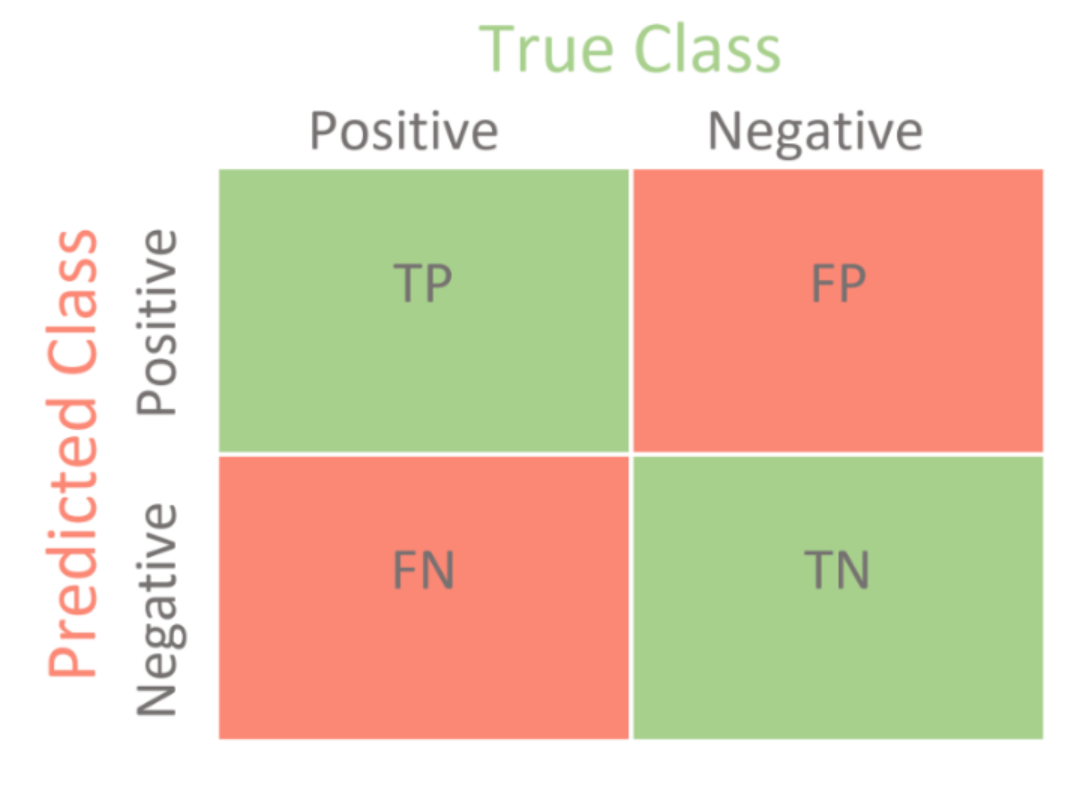

Type 1 error : False Positive <br>
Nasabah terprediksi akan mendeposit tetapi ternyata tidak <br>
Sumber daya seperti biaya dan waktu akan terbuang sia-sia

Type 1 error : False Negative <br>
Nasabah terprediksi tidak akan mendeposit tetapi ternyata mendeposit <br>
Bank akan kehilangan calon nasabah yang berpotensi mendeposit uang

Dengan demikian, dari dampak yang diketahui diatas, model yang akan dibuat pada masalah ini adalah model yang dapat menimimalkan False Positive atau kesalahan prediksi untuk nasabah yang tidak akan mendeposit uangnya sehingga mengurangi pengeluaran sumber daya kampanye bank, namun tetap memaksimalkan prediksi untuk nasabah-nasabah yang potensial. Oleh karena itu, metric evaluasi yang diperlukan adalah ROC AUC dan confusion matrix.

<h3> <b> Data Understanding </b> </h3>

Dataset ini berisikan informasi mengenai riwayat nasabah-nasabah sebelumnya dimana berdasarkan fitur-fitur yang ada, apakah nasabah tersebut akhirnya mendepositkan uangnya atau tidak.

Informasi fitur atau atribut :

Customer profile :
- Age : Umur nasabah
- Job : Pekerjaan nasabah
- Balance : Saldo nasabah
- Housing : Apakah memiliki cicilan rumah
- Loan : Apakah memiliki hutang pribadi

Marketing data :
- contact: Tipe kontak komunikasi.
- month: Bulan kontak terakhir nasabah dalam tahun.
- campaign: Jumlah kontak yang dilakukan saat kampanye.
- pdays: Jumlah hari setelah klien dihubungi dari kampanye sebelumnya.
- poutcome: Hasil dari kampanye pemasaran sebelumnya.
- deposit: Apakah nasabah menyetor atau tidak.


Import Library

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from scipy.stats import normaltest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import RocCurveDisplay

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import shap

Load Dataset

In [169]:
df = pd.read_csv('data_bank_marketing_campaign.csv')
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


Dari informasi mengenai yang ditampilkan dapat dilihat bahwa : <br>
Jumlah kolom = 11 kolom <br>
Jumlah baris atau data = 7813 data

Data Numerikal :
1. age
2. balance
3. campaign
4. pdays

Data Kategorikal :
1. job
2. housing
3. loan
4. contact
5. month
6. poutcome
7. deposit

Dari 11 kolom atau fitur pada data, fitur deposit merupakan fitur target pada model klasifikasi yang nantinya akan dibuat.



<h3> <b> Data Cleaning </b> </h3>

<h4> <b> Format Data </b> </h4>

In [171]:
df['deposit'] = np.where(df['deposit']=='yes', 1,0)
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0


Karena kolom deposit merupakan target value berupa binary class, data pada kolom deposit akan diubah menjadi 1 untuk nilai 'yes' dan 0 untuk 'no'

In [172]:
df['bin_age']=pd.cut(df['age'],bins=[0, 25, 40, 60, float('inf')],labels=["<25 tahun","25 - 40 tahun", "41 - 60 tahun",">60 tahun"])
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,bin_age
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1,41 - 60 tahun
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1,25 - 40 tahun
2,51,admin.,3025,no,no,cellular,may,1,352,other,1,41 - 60 tahun
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0,25 - 40 tahun
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0,25 - 40 tahun


In [173]:
df['bin_balance']=pd.qcut(df['balance'],5,labels=['-6847.001 - 67.0','67.0 - 337.0','337.1 - 855.0','855.1 - 2170.2','2170.3 - 66653.0'])
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,bin_age,bin_balance
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1,41 - 60 tahun,855.1 - 2170.2
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1,25 - 40 tahun,-6847.001 - 67.0
2,51,admin.,3025,no,no,cellular,may,1,352,other,1,41 - 60 tahun,2170.3 - 66653.0
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0,25 - 40 tahun,-6847.001 - 67.0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0,25 - 40 tahun,67.0 - 337.0


Disini dibuat sebuah kolom baru bernama bin_age dan juga bin_balance yang dimana kolom bin_age dan bin_balance merupakan pembagian dari kolom age dan juga balance agar informasi mengenai nasabah lebih ter-spesifik berdasarkan interval umur dan juga balance. Hal ini diperuntukkan kebutuhan analisis saja

<h4> <b> Missing Values </b> </h4>


In [174]:
# Display unique items from each column
def display_unique(df):
  listUniqueItem = []
  for col in df.columns :
      listUniqueItem.append( [col, df[col].nunique(), df[col].isna().sum(), df[col].unique()])

  tableDesc = pd.DataFrame(columns=['Column Name', 'Total of Unique', 'null', 'Unique Sample'],
                      data=listUniqueItem)
  return tableDesc
display_unique(df)

,Column Name,Total of Unique,null,Unique Sample
0,age,75,0,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,12,0,"[admin., self-employed, services, housemaid, t..."
2,balance,3153,0,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,2,0,"[no, yes]"
4,loan,2,0,"[no, yes]"
5,contact,3,0,"[cellular, telephone, unknown]"
6,month,12,0,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,32,0,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,422,0,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,4,0,"[unknown, other, failure, success]"


In [175]:
# Check null values
df_null = pd.DataFrame({'Null Values' : df.isnull().sum(),
                        'Percentage Null Values' :
                         (df.isna().sum()) / (df.shape[0]) * (100)})
df_null = df_null[df_null['Null Values']>0]
df_null.sort_values('Percentage Null Values', ascending=False)

,Null Values,Percentage Null Values


Tidak ditemukan nilai yang kosong pada dataframe

<h4><b> Data Duplicate </b></h4>

In [176]:
# Check for duplicated rows
print('Number of duplicated rows = ', df.duplicated().sum())

Number of duplicated rows =  8


In [177]:
df[df.duplicated()==True]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,bin_age,bin_balance
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,0,25 - 40 tahun,-6847.001 - 67.0
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,1,41 - 60 tahun,-6847.001 - 67.0
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,0,41 - 60 tahun,-6847.001 - 67.0
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,0,41 - 60 tahun,-6847.001 - 67.0
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,0,25 - 40 tahun,-6847.001 - 67.0
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,0,25 - 40 tahun,-6847.001 - 67.0
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,0,25 - 40 tahun,-6847.001 - 67.0
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,1,25 - 40 tahun,67.0 - 337.0


In [178]:
df.drop_duplicates(inplace=True)

Ditemukan 8 baris data yang merupakan duplikat sehingga baris data ini akan dihapus

<h4><b> Descriptive Analysis </b></h4>

In [179]:
# Descriptive statistics for numerical columns
numerical_summary = df.describe()

# Descriptive statistics for categorical columns
categorical_summary = df.describe(include=['object'])

numerical_summary

,age,balance,campaign,pdays,deposit
count,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000
mean,41.257783,1513.968225,2.520564,51.462268,0.477899
std,11.922833,3090.508938,2.728204,108.115084,0.499543
min,18.000000,-6847.000000,1.000000,-1.000000,0.000000
25%,32.000000,128.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,2.000000,-1.000000,0.000000
75%,49.000000,1685.000000,3.000000,41.000000,1.000000
max,95.000000,66653.000000,63.000000,854.000000,1.000000


In [180]:
len(df[df['pdays']==-1])

5809

In [181]:
categorical_summary

,job,housing,loan,contact,month,poutcome
count,7805,7805,7805,7805,7805,7805
unique,12,2,2,3,12,4
top,management,no,no,cellular,may,unknown
freq,1789,4136,6781,5623,1973,5811


Statistik deskriptif menunjukkan :
- kolom balance menunjukkan rentang nilai yang luas dimana nilai minimal sebesar -6847 dan nilai maksimal sebesar 66653. Hal ini menunjukkan perbedaan nasabah yang cukup signifikan dalam hal saldo yang dimiliki.
- Kolom campaign juga menunjukkan rentang nilai yang luas dimana nilai minimal sebesar 1 dan nilai maksimal sebesar 63. Hal ini menunjukkan perbedaan cara marketing yang cukup signifikan antar nasabah.
- Kolom pdays menunjukkan nilai -1 yang mana nilai -1 ini tidak diketahui maksudnya. Dengan jumlah baris sebanyak 5809 yang berisikan nilai -1, menunjukkan adanya kesalahan pada data yang dimana tidak diketahui maksud dari nilai -1 ini, apakah berarti tidak pernah dikontak atau bagaimana.

<h4><b> Check Outlier </b></h4>

In [182]:
df_numerikal = df.select_dtypes('int64')

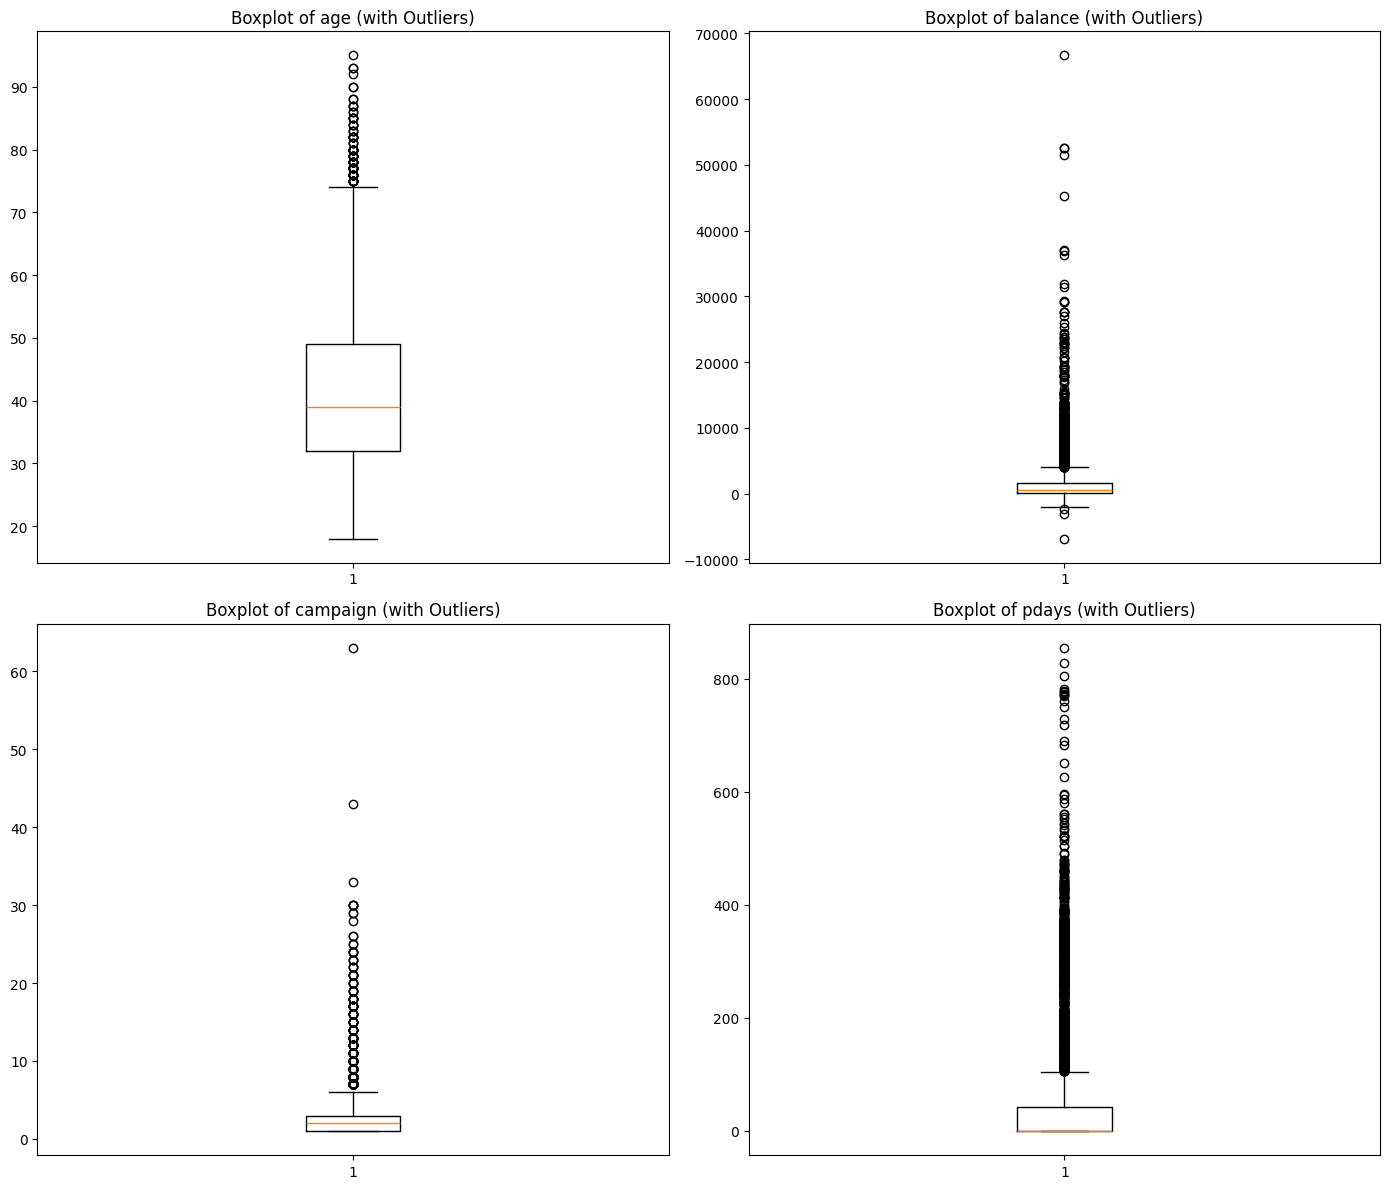

In [183]:
f, axes = plt.subplots(2, 2, figsize = (14,12))
axes = axes.flatten()
for i, column in enumerate(df_numerikal) :
    axes[i].set_title(f"Boxplot of {column} (with Outliers)")
    axes[i].boxplot((df_numerikal[column].dropna()))

# Hide empty subplots
for j in range(i + 1, len(axes)):
    f.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [184]:
# Iterasi untuk setiap kolom numerik
data_outlier = []
for col in df_numerikal.columns:
    q1 = df_numerikal[col].quantile(q=0.25)
    median = df_numerikal[col].median()
    q3 = df_numerikal[col].quantile(q=0.75)
    iqr = q3 - q1
    min_data = q1 - 1.5 * iqr
    max_data = q3 + 1.5 * iqr
    outliers = df_numerikal[(df_numerikal[col] < min_data) | (df_numerikal[col] > max_data)]
    num_outliers = len(outliers)
    data_outlier.append([col, min_data, q1, median, q3, max_data, iqr, num_outliers])


df_outlier = pd.DataFrame(data_outlier, columns=['Nama Kolom', 'Min Data', 'Q1', 'Q2/Median', 'Q3', 'Max Data', 'IQR', 'Jumlah Outliers'])
df_outlier.sort_values('Jumlah Outliers', ascending=False).reset_index(drop=True)

,Nama Kolom,Min Data,Q1,Q2/Median,Q3,Max Data,IQR,Jumlah Outliers
0,pdays,-64.0,-1.0,-1.0,41.0,104.0,42.0,1432
1,balance,-2207.5,128.0,550.0,1685.0,4020.5,1557.0,736
2,campaign,-2.0,1.0,2.0,3.0,6.0,2.0,429
3,age,6.5,32.0,39.0,49.0,74.5,17.0,121


Kolom pdays dan balance menjadi kolom kedua tertinggi yang memiliki outlier, dimana pdays sebesar 1432 dan balance sebesar 736. Seperti yang sudah dilihat pada statistik deskriptif, hal ini menunjukkan perbedaan karakter nasabah yang besar.

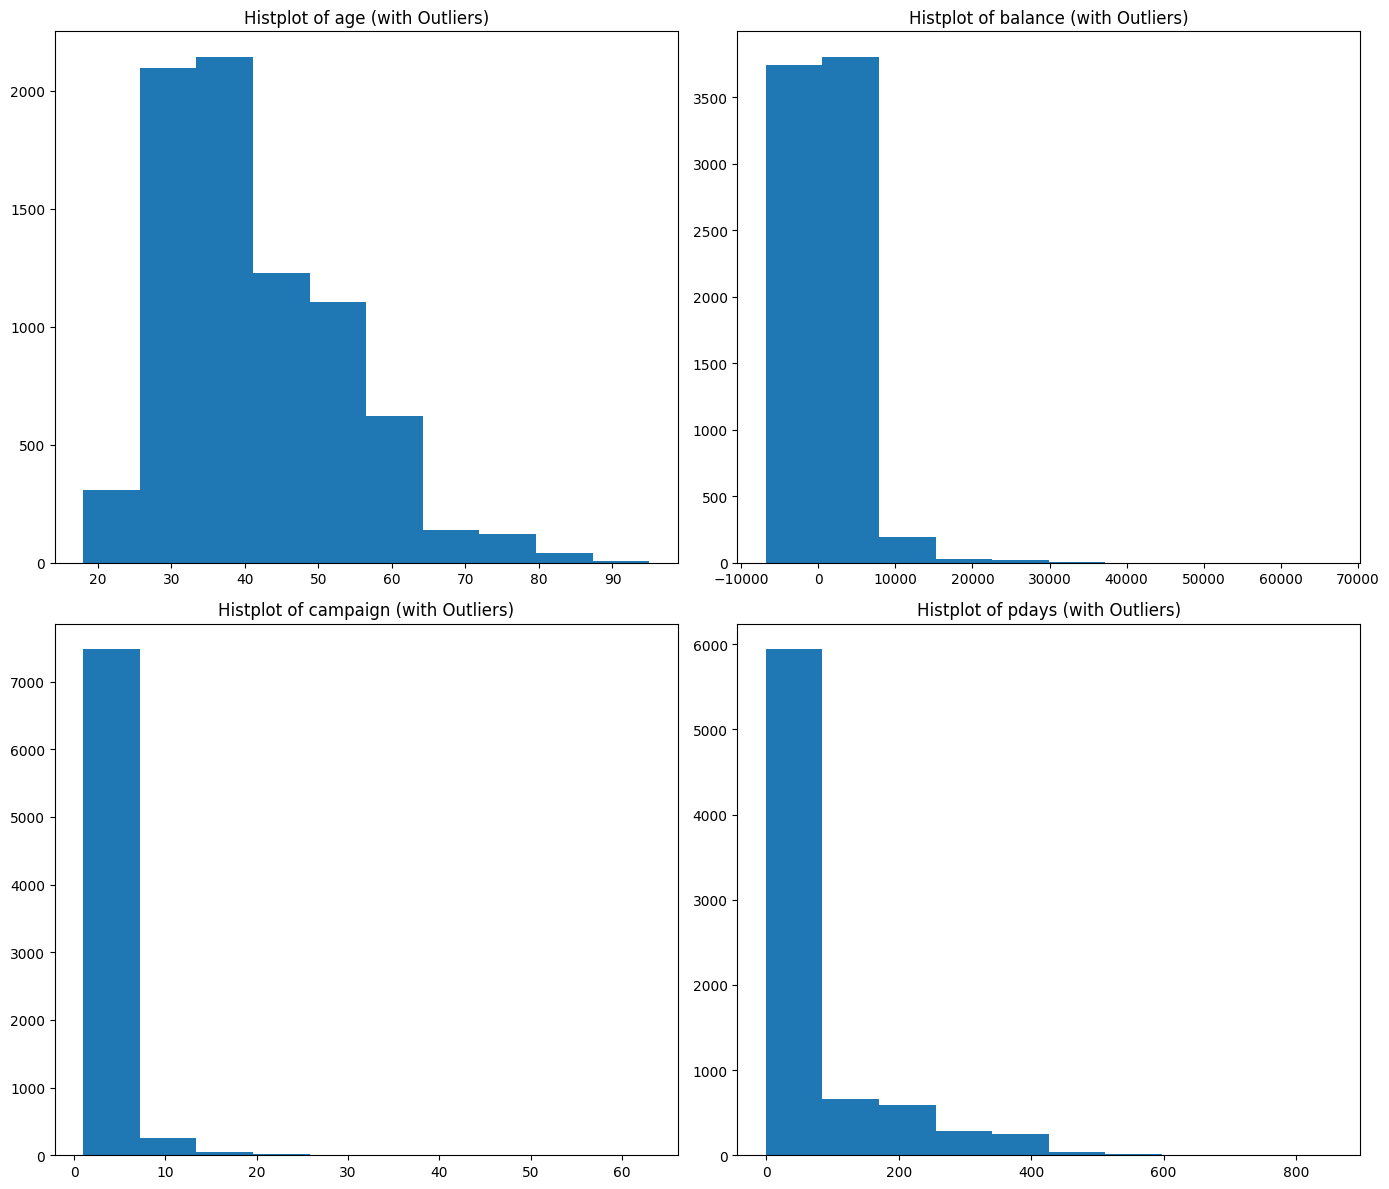

In [185]:
f, axes = plt.subplots(2, 2, figsize = (14,12))
axes = axes.flatten()
for i, column in enumerate(df_numerikal) :
    axes[i].set_title(f"Histplot of {column} (with Outliers)")
    axes[i].hist((df_numerikal[column]))

# Hide empty subplots
for j in range(i + 1, len(axes)):
    f.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [186]:
dist_normal_results = []
for col in df_numerikal.columns:
    stat, p = normaltest(df_numerikal[col])
    normal = "Berdistribusi normal" if p > 0.05 else "Tidak Berdistribusi normal"  # Ambil alpha = 0.05 sebagai batas signifikansi
    dist_normal_results.append([col, stat, p, normal])


dist_normal_df = pd.DataFrame(dist_normal_results, columns=['Kolom', 'Test Statistic', 'p-value', 'Asumsi'])
dist_normal_df

,Kolom,Test Statistic,p-value,Asumsi
0,age,819.059254,1.391691e-178,Tidak Berdistribusi normal
1,balance,9799.383492,0.000000e+00,Tidak Berdistribusi normal
2,campaign,8669.137504,0.000000e+00,Tidak Berdistribusi normal
3,pdays,3877.270153,0.000000e+00,Tidak Berdistribusi normal


Dari data numerikal yang diuji normalitasnya, semua kolom numerikal menunjukkan tidak berdistribusi normal sehingga nantinya akan digunakan robust scaler pada kolom ini pada saat melakukan modelling agar model dapat lebih konsisten

<h4><b> Feature Selection </b></h4>

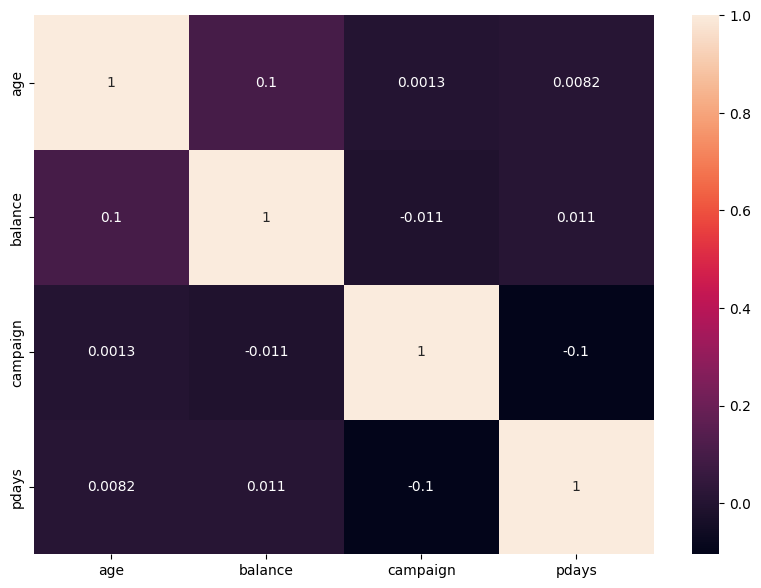

In [187]:
df_num = df.select_dtypes('int64')
plt.figure(figsize=(10,7))
sns.heatmap(data=df_num.corr(), annot= True)
plt.show()

Masing-masing kolom numerikal menunjukkan independensinya dimana antar kolom tidak memiliki pengaruh satu sama lain yang besar. Selain itu, ini juga menunjukkan bahwa tidak ada multikoliniearitas antar kolom

In [188]:
df.drop('pdays',axis=1, inplace=True)

Merujuk pada statistik deskriptif, kolom pdays akan dibuang dari dataframe karena banyaknya nilai -1 pada data, yaitu sebesar 5809 dari total 7813 data. Nilai -1 ini tidak diketahui artinya, jika nilai -1 adalah nasabah yang belum pernah di kontak, hal ini bertentangan dengan kolom contact dan juga month yang dimana kolom contact dan kolom month menunjukkan bagaimana nasabah dihubungi dan kapan terakhir kali dihubungi. Selain itu, jika dibiarkan untuk masuk kedalam model machine learning, intepretasi pdays akan menjadi rancu dimana nilai -1 akan memengaruhi nilai rendah pdays lainnya yang padahal nilai -1 ini tidak diketahui artinya.

<h3> <b> Data Analysis </b> </h3>

<h4> <b> Deposit Proportion </b> </h4>

In [189]:
df_deposit = df['deposit'].value_counts().reset_index()
df_deposit.columns = ['Deposit', 'Jumlah']
df_deposit

,Deposit,Jumlah
0,0,4075
1,1,3730


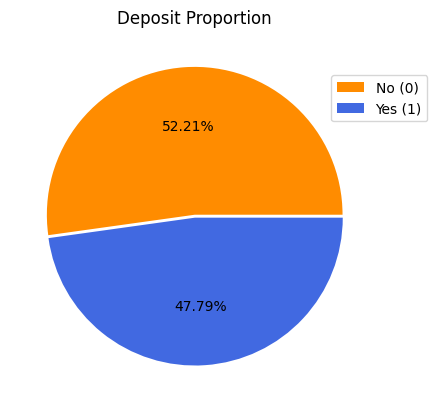

In [190]:
plt.pie(
    x = df_deposit['Jumlah'],
    labels=None,
    autopct='%.2f%%',
    explode=[0.01, 0.01],
    colors=['darkorange', 'royalblue']
)
plt.title('Deposit Proportion')
plt.legend([ 'No (0)','Yes (1)',], bbox_to_anchor=(0.85,0.9))
plt.ylabel(None)
plt.show()

Jumlah data target orang yang melakukan deposit sebesar 3730 dengan proporsi sebesar 47.79% dan yang tidak sebesar 4075 dengan proporsi sebesar 52.21% menunjukkan komposisi data target yang cukup seimbang

<h4> <b> Categorical Features </b> </h4>

In [191]:
categorical_features = ['job','housing', 'loan', 'contact', 'month', 'poutcome']

In [192]:
for col in categorical_features :
    cat_analysis = pd.crosstab(index=df[col], columns=df['deposit'], values=df['deposit'], aggfunc='count')
    cat_analysis['Total'] = cat_analysis.sum(axis=1)
    cat_analysis = cat_analysis.sort_values(1, ascending=False)
    display(cat_analysis)

deposit,0,1,Total
job,,,
management,876,913,1789
technician,694,595,1289
blue-collar,840,503,1343
admin.,492,444,936
retired,175,365,540
services,398,260,658
student,63,184,247
unemployed,102,147,249
self-employed,153,127,280


deposit,0,1,Total
housing,,,
no,1748,2388,4136
yes,2327,1342,3669


deposit,0,1,Total
loan,,,
no,3381,3400,6781
yes,694,330,1024


deposit,0,1,Total
contact,,,
cellular,2524,3099,5623
unknown,1275,361,1636
telephone,276,270,546


deposit,0,1,Total
month,,,
may,1315,658,1973
aug,586,495,1081
jul,620,429,1049
apr,247,415,662
jun,472,385,857
feb,233,301,534
nov,367,290,657
oct,43,243,286
sep,34,178,212


deposit,0,1,Total
poutcome,,,
unknown,3438,2373,5811
success,65,696,761
failure,413,435,848
other,159,226,385


In [193]:
for col in categorical_features :
    cat_analysis_proportion = df.groupby(col)["deposit"].value_counts(normalize=True).unstack()
    display(cat_analysis_proportion.sort_values(by=[1],ascending=False ))

deposit,0,1
job,,
student,0.255061,0.744939
retired,0.324074,0.675926
unemployed,0.409639,0.590361
management,0.489659,0.510341
unknown,0.518519,0.481481
admin.,0.525641,0.474359
technician,0.538402,0.461598
self-employed,0.546429,0.453571
entrepreneur,0.601695,0.398305


deposit,0,1
housing,,
no,0.422631,0.577369
yes,0.634233,0.365767


deposit,0,1
loan,,
no,0.498599,0.501401
yes,0.677734,0.322266


deposit,0,1
contact,,
cellular,0.448871,0.551129
telephone,0.505495,0.494505
unknown,0.779340,0.220660


deposit,0,1
month,,
mar,0.110553,0.889447
dec,0.117647,0.882353
oct,0.150350,0.849650
sep,0.160377,0.839623
apr,0.373112,0.626888
feb,0.436330,0.563670
aug,0.542091,0.457909
jun,0.550758,0.449242
nov,0.558600,0.441400


deposit,0,1
poutcome,,
success,0.085414,0.914586
other,0.412987,0.587013
failure,0.487028,0.512972
unknown,0.591637,0.408363


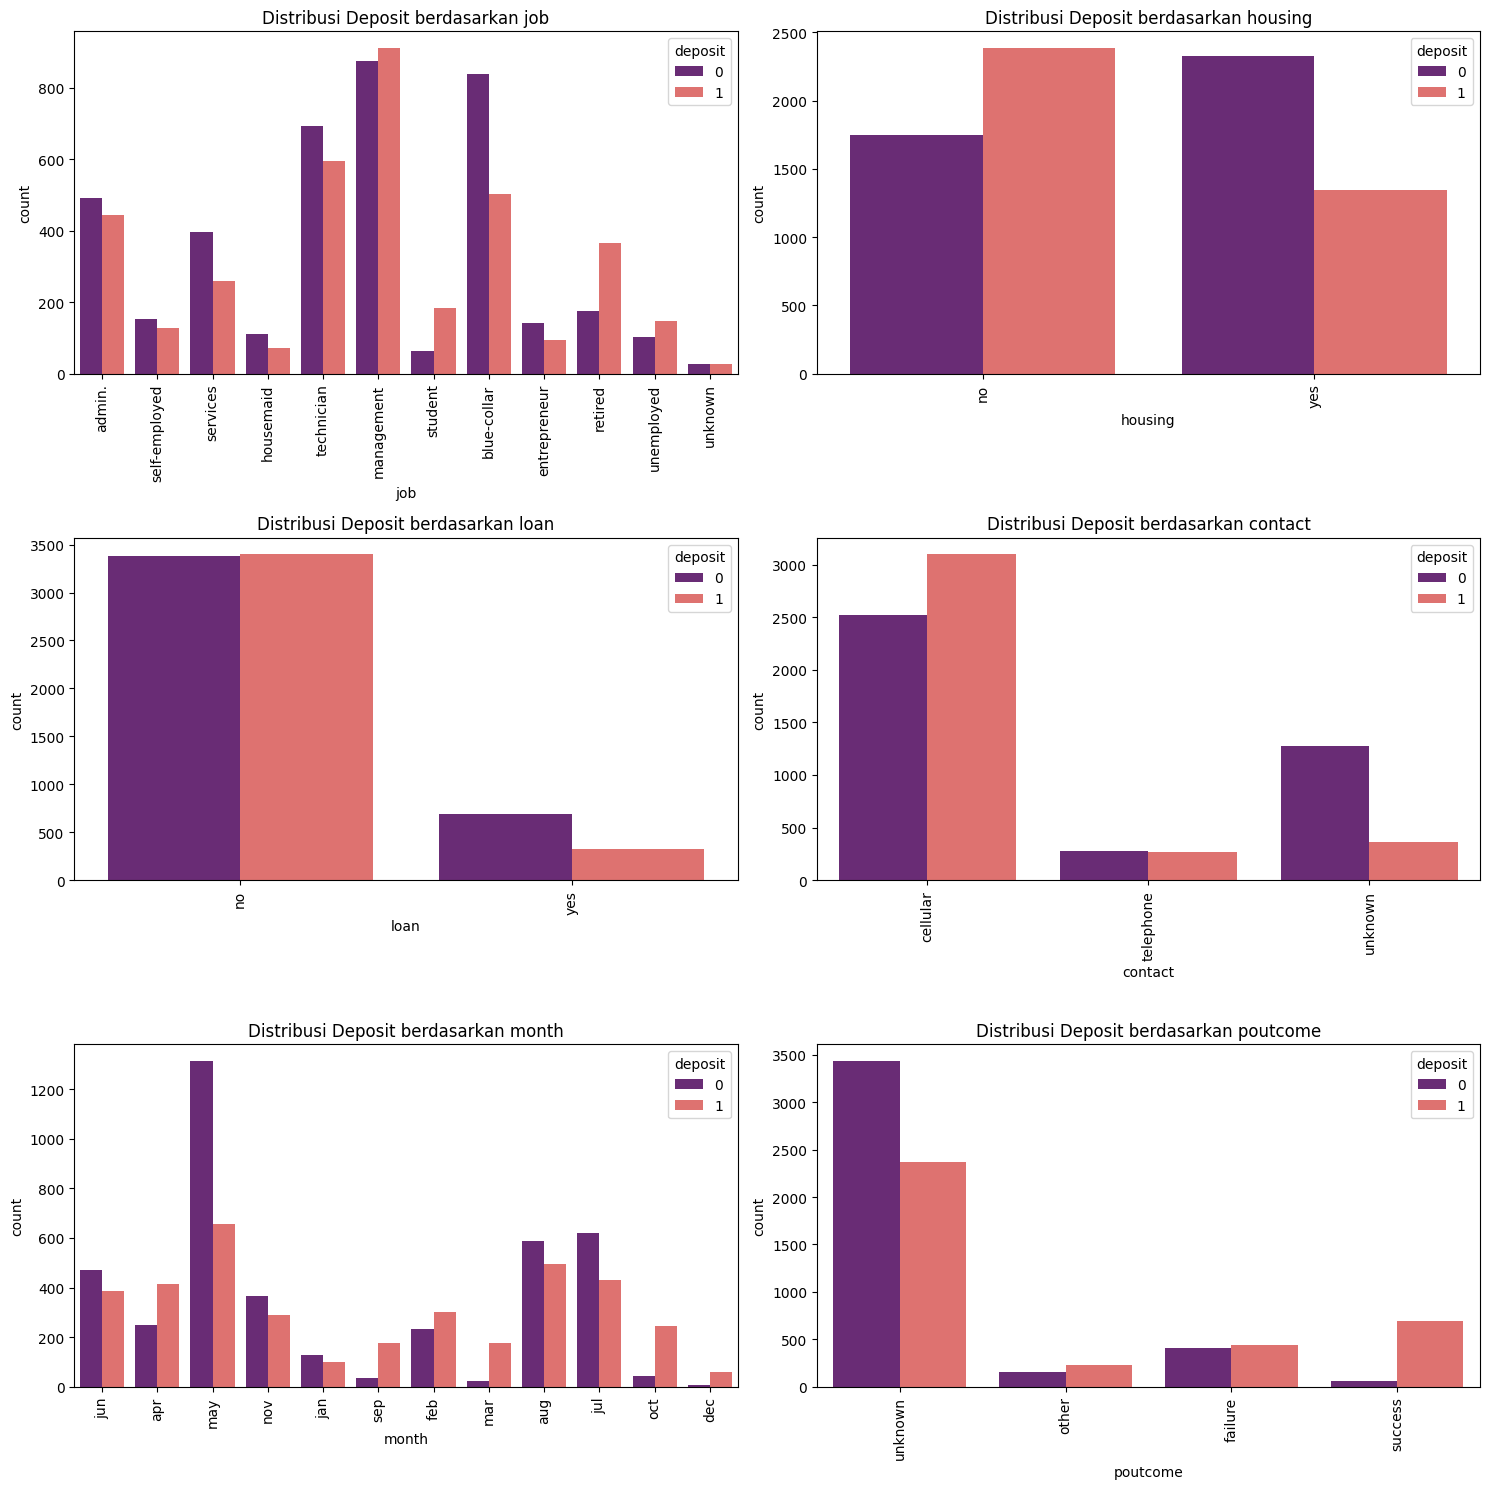

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=df[feature], hue=df['deposit'], palette='magma', ax=axes[i])
    axes[i].set_title(f'Distribusi Deposit berdasarkan {feature}')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

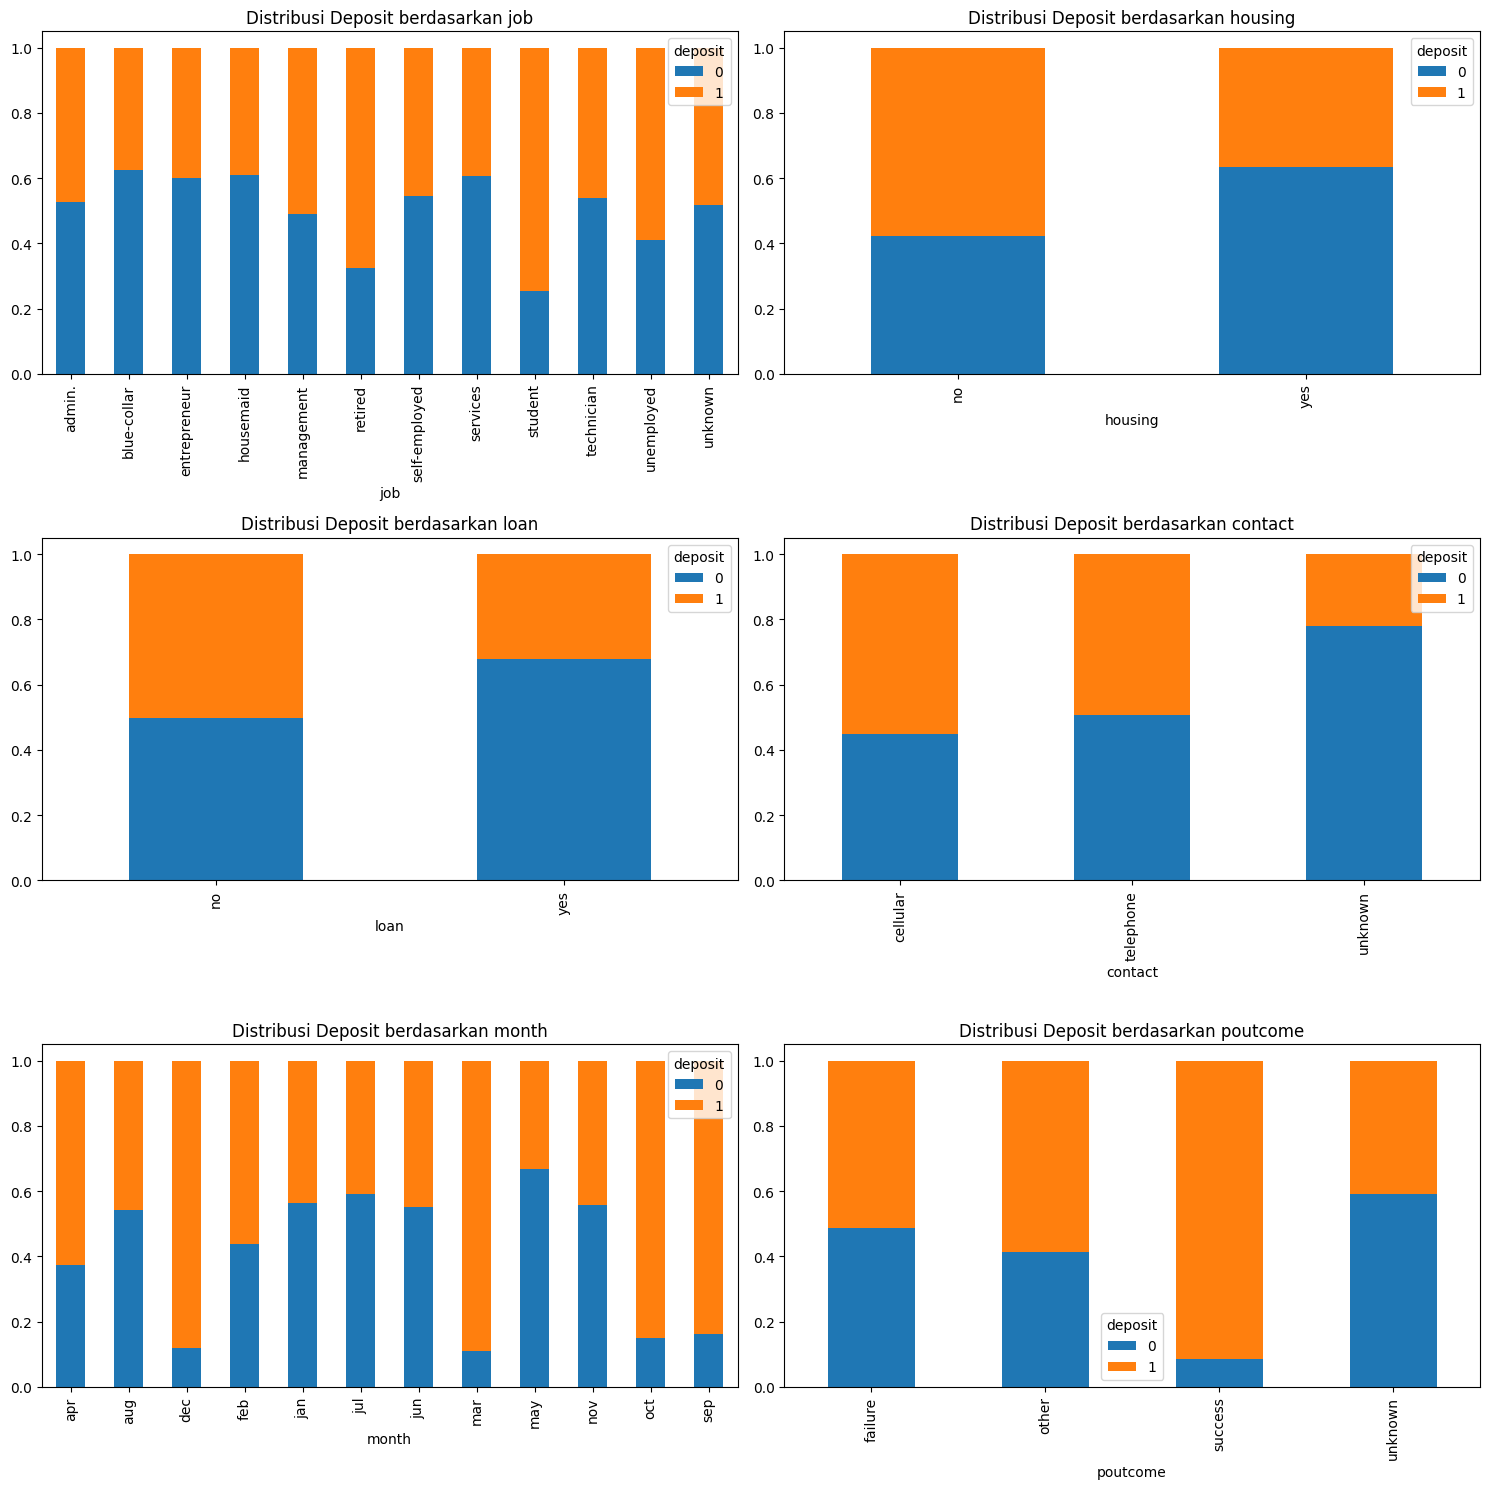

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    pd.crosstab(df[feature], df['deposit'], normalize= 0).plot(kind= 'bar', stacked= True, ax= axes[i])
    axes[i].set_title(f'Distribusi Deposit berdasarkan {feature}')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

<h4> <b> Numerikal Features </b> </h4>

In [196]:
bin_age = pd.crosstab(index=df['bin_age'], columns=df['deposit'], values=df['deposit'], aggfunc='count')
bin_age['Total'] = bin_age.sum(axis=1)
bin_age = bin_age.sort_values(1, ascending=False)
display(bin_age)

deposit,0,1,Total
bin_age,,,
25 - 40 tahun,2172,1866,4038
41 - 60 tahun,1728,1292,3020
>60 tahun,78,362,440
<25 tahun,97,210,307


In [197]:
bin_age = df.groupby('bin_age')["deposit"].value_counts(normalize=True).unstack()
display(bin_age.sort_values(by=[1],ascending=False ))

C:\Users\Legion\AppData\Local\Temp\ipykernel_14152\2517455021.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_age = df.groupby('bin_age')["deposit"].value_counts(normalize=True).unstack()


deposit,0,1
bin_age,,
>60 tahun,0.177273,0.822727
<25 tahun,0.315961,0.684039
25 - 40 tahun,0.537890,0.462110
41 - 60 tahun,0.572185,0.427815


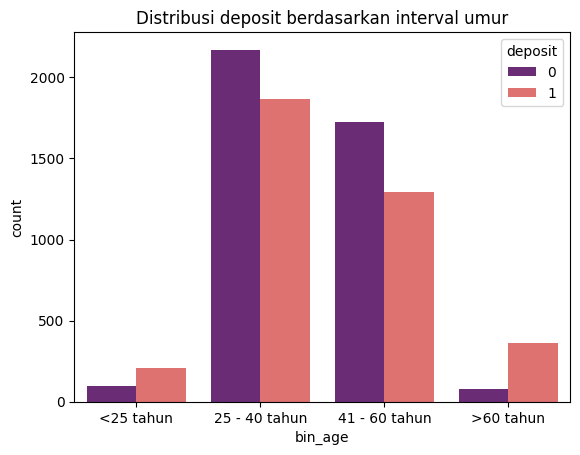

In [ ]:
sns.countplot(x=df['bin_age'], hue=df['deposit'], palette='magma')
plt.title('Distribusi deposit berdasarkan interval umur')
plt.show()

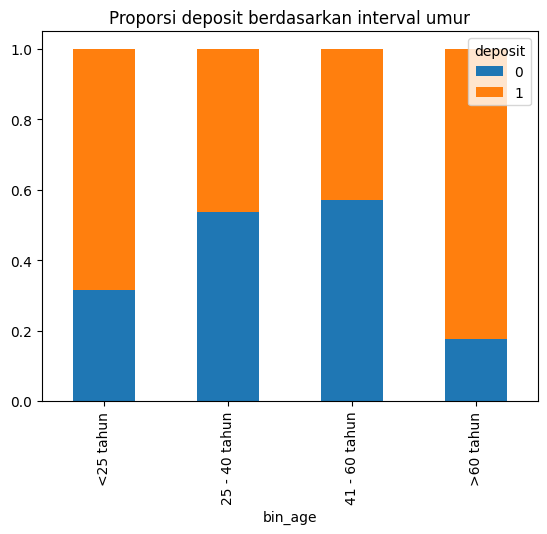

In [199]:
pd.crosstab(df['bin_age'], df['deposit'], normalize= 0).plot(kind= 'bar', stacked= True)
plt.title('Proporsi deposit berdasarkan interval umur')
plt.show()

In [200]:
bin_balance = pd.crosstab(index=df['bin_balance'], columns=df['deposit'], values=df['deposit'], aggfunc='count')
bin_balance['Total'] = bin_balance.sum(axis=1)
bin_balance = bin_balance.sort_values(1, ascending=False)
display(bin_balance)

deposit,0,1,Total
bin_balance,,,
2170.3 - 66653.0,628,934,1562
855.1 - 2170.2,739,820,1559
337.1 - 855.0,821,740,1561
67.0 - 337.0,862,704,1566
-6847.001 - 67.0,1025,532,1557


In [201]:
bin_balance = df.groupby('bin_balance')["deposit"].value_counts(normalize=True).unstack()
display(bin_balance.sort_values(by=[1],ascending=False ))

C:\Users\Legion\AppData\Local\Temp\ipykernel_14152\1574805072.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_balance = df.groupby('bin_balance')["deposit"].value_counts(normalize=True).unstack()


deposit,0,1
bin_balance,,
2170.3 - 66653.0,0.402049,0.597951
855.1 - 2170.2,0.474022,0.525978
337.1 - 855.0,0.525945,0.474055
67.0 - 337.0,0.550447,0.449553
-6847.001 - 67.0,0.658317,0.341683


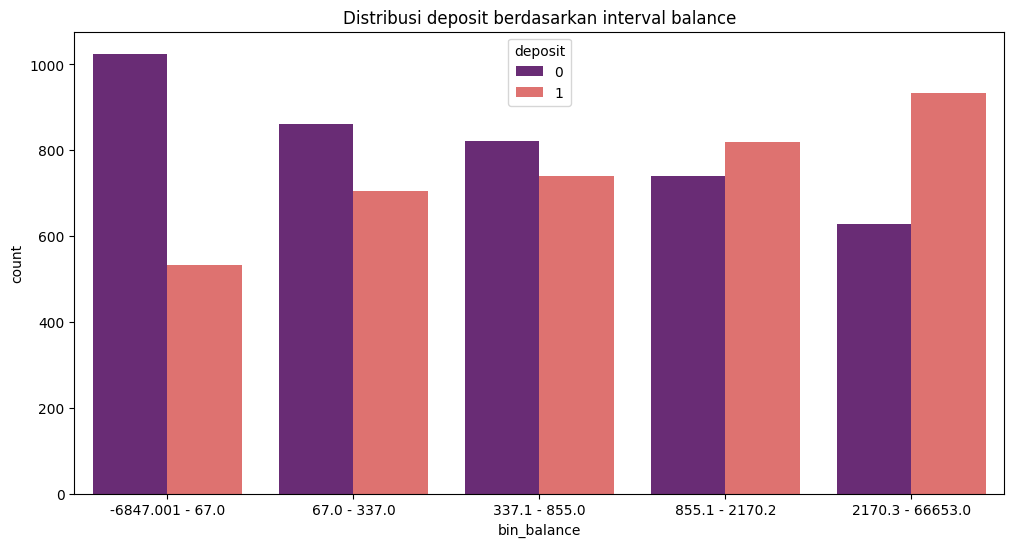

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['bin_balance'], hue=df['deposit'], palette='magma')
plt.title("Distribusi deposit berdasarkan interval balance")
plt.show()

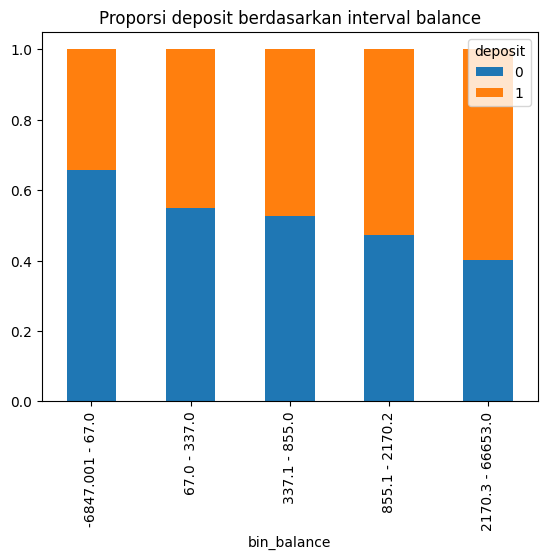

In [203]:
pd.crosstab(df['bin_balance'], df['deposit'], normalize= 0).plot(kind= 'bar', stacked= True)
plt.title('Proporsi deposit berdasarkan interval balance')
plt.show()

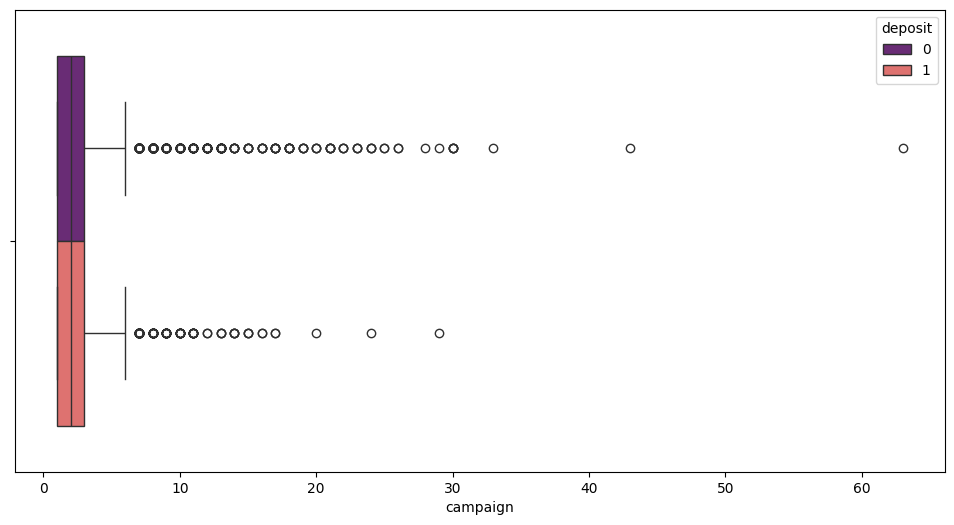

In [204]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['campaign'], hue=df['deposit'], palette='magma')
plt.show()

Hasil plotting kolom kategorikal terhadap kolom deposit adalah :
1. <b>Job</b> : 
- Nasabah dengan pekerjaan management lebih banyak melakukan deposit dibanding dengan dengan pekerjaan lainnya. 
- Namun, nasabah retired dan student memiliki proporsi lebih tinggi dalam melakukan deposit dibanding nasabah lainnya.
2. <b>Housing</b> : 
- Nasabah tanpa kredit rumah cenderung lebih banyak melakukan deposit.
3. <b>Loan</b> : 
- Nasabah tanpa pinjaman lebih sedikit cenderung melakukan deposit dibanding dengan nasabah tanpa pinjaman tetapi menolak melakukan deposit. 
- Namun, nasabah yang memiliki pinjaman jauh lebih banyak tidak melakukan deposit.
4. <b>Contact</b>: 
- Nasabah yang dihubungi via "cellular" lebih cenderung melakukan deposit dibanding "telephone". 
- Nasabah yang tidak diketahui tipe kontaknya jauh lebih banyak menolak melakukan deposit.
5. <b>Month</b> : 
- Nasabah paling banyak dihubungi  bulan mei, juni, agustus, namun hasilnya kurang baik dimana lebih banyak nasabah yang memilih untuk tidak melakukan deposit
- Nasabah yang dihubungi bulan maret, december, oktober, september memiliki proporsi lebih tinggi dalam melakukan deposit dibanding bulan-bulan lainnya walaupun jumlah nasabah yang dihubungi tidak sebanyak bulan-bulan lainnya.
6. <b>Poutcome</b> : 
- Nasabah yang memiliki riwayat sukses dalam kampanye sebelumnya cenderung melakukan deposit kembali dibanding yang gagal dan yang lainnya. 
- Nasabah yang tidak diketahui riwayat kampanye sebelumnya jauh lebih banyak menolak melakukan deposit.

Hasil Plotting kolom numerikal terhadap kolom deposit adalah :
1. <b> Age </b> :
- Nasabah direntang umur kurang dari 25 tahun dan lebih dari 60 tahun menunjukkan proporsi lebih tinggi dalam melakukan deposit dibanding nasabah di umur 25-40 dan 41-60.
- Nasabah di umur 25-40 dan 41-60 walaupun lebih banyak yang melakukan deposit dari nasabah umur kurang dari 25 tahun dan lebih dari 60 tahun, nasabah yang menolak melakukan deposit lebih banyak dibanding yang memilih melakukan deposit.

2. <b> Balance </b> :
- Nasabah yang memiliki tabungan lebih besar cenderung melakukan deposit dibanding tabungan yang lebih sedikit.

3. <b> Campaign </b>
- Secara median, nasabah yang melakukan deposit dan yang tidak memiliki nilai yang sama.
- Nasabah yang dikontak lebih banyak berpotensi menolak melakukan deposit.

<h3> <b> Modelling </b> </h3>

In [205]:
df_encoded = df.copy()
print(len(df_encoded))

7805


<h4> <b> Default </b> </h4>

In [206]:
object_pipeline = Pipeline(
    steps = [('encode', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))]
)

numerical_pipeline = Pipeline(
    steps = [
        ('scaling', RobustScaler()), ]
)

transformer = ColumnTransformer([
    ('cat_preprocessing', object_pipeline, ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']),
    ('num_preprocessing', numerical_pipeline, ['balance', 'campaign', 'age'])
], remainder= 'passthrough')

    

- Data kategorikal akan diencode terlebih dahulu dengan OneHotEncoder
- Data numerikal akan dilakukan scaling dengan menggunakan robust scaler

In [207]:
X = df_encoded.drop(['deposit', 'bin_age', 'bin_balance'],axis=1)
y = df_encoded['deposit']

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [209]:
knn = KNeighborsClassifier()
logreg = LogisticRegression(random_state= 20)
rf = RandomForestClassifier(random_state= 20)
dt = DecisionTreeClassifier(random_state= 20)
ab = AdaBoostClassifier(random_state= 20)
gb = GradientBoostingClassifier(random_state= 20)

pipeline = Pipeline([
    ('preprocess', transformer),
    ('Model', knn)
])
skfold= StratifiedKFold(n_splits=10, shuffle= True, random_state= 20)
hyperparams= {
    'Model' : [knn, logreg, rf, dt, ab, gb]
}

search_model = GridSearchCV(pipeline, param_grid= hyperparams, cv= skfold, scoring= 'roc_auc', n_jobs= -1, error_score="raise")

In [210]:
pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome']),
                                                 ('num_preprocessing',
                                                  Pipeline(steps=[('scaling',
                                                                   RobustScaler())]),
                                                  ['balance', 'campaign',
                                                   'age'])])),
                ('Model', KNeighborsClassifier())])

In [211]:
search_model.fit(X_train, y_train)
print(search_model.best_score_)
print(search_model.best_params_)
pd.DataFrame(search_model.cv_results_).sort_values(by= 'rank_test_score').set_index('param_Model').drop('params', axis= True)

0.7736280836479816
{'Model': GradientBoostingClassifier(random_state=20)}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
param_Model,,,,,,,,,,,,,,,,,
GradientBoostingClassifier(random_state=20),0.842947,0.058158,0.007244,0.002008,0.782752,0.772001,0.769646,0.806856,0.772826,0.750669,0.794360,0.739763,0.775549,0.771858,0.773628,0.018213,1
LogisticRegression(random_state=20),0.065008,0.010483,0.018106,0.004410,0.759351,0.762726,0.747327,0.800613,0.755384,0.748816,0.783660,0.718502,0.744730,0.758533,0.757964,0.021072,2
AdaBoostClassifier(random_state=20),0.407588,0.032714,0.026678,0.003868,0.759782,0.756453,0.744901,0.795879,0.771153,0.745908,0.777839,0.704363,0.741431,0.738950,0.753666,0.023772,3
RandomForestClassifier(random_state=20),1.140050,0.040555,0.036764,0.001687,0.757530,0.746717,0.743624,0.774412,0.752738,0.738729,0.780150,0.723468,0.759331,0.743582,0.752028,0.015933,4
KNeighborsClassifier(),0.035572,0.003434,0.136872,0.006745,0.722157,0.721392,0.689384,0.736678,0.711584,0.711481,0.749804,0.681903,0.708311,0.715455,0.714815,0.018957,5
DecisionTreeClassifier(random_state=20),0.088101,0.011837,0.011394,0.001277,0.641176,0.605803,0.638991,0.632143,0.594814,0.624043,0.624820,0.586909,0.644954,0.634887,0.622854,0.019209,6


Model yang akan diterapkan pada data deposit ini adalah K-Nearest Neighbor, Logistic Regression, Random Forest, Decision Tree, AdaBoost, dan Gradient Boosting. Dari hasil yang didapatkan berdasarkan nilai ROC AUC, model Gradient Boosting menjadi model yang memiliki nilai ROC AUC paling tinggi sehingga Gradient Boosting akan digunakan untuk pemodelan.

<h4> <b> Hyperparameter Tuning </b> </h4>

In [212]:
pipeline = Pipeline([
    ('preprocess', transformer),
    ('Model', GradientBoostingClassifier(random_state= 20))
])
skfold= StratifiedKFold(n_splits=10, shuffle= True, random_state= 10)
param_grid = {
    'Model__n_estimators': [50, 100, 200],
    'Model__learning_rate': [0.01, 0.1, 1, 10],
    'Model__max_depth': [3, 5, 7],
    'Model__min_samples_leaf': [3,5,10],
    'Model__min_samples_split' : [2,4,6],
    'Model__loss' : ['log_loss', 'exponential'],
    'Model__random_state' : [20]
}

RD_Tuning = RandomizedSearchCV(pipeline, param_distributions= param_grid, cv= skfold, scoring= 'roc_auc', n_jobs= -1, n_iter=10, error_score="raise", random_state=20)


RD_Tuning.fit(X_train, y_train)
print(RD_Tuning.best_score_)
print(RD_Tuning.best_params_)
pd.DataFrame(RD_Tuning.cv_results_).sort_values(by= 'rank_test_score').set_index('rank_test_score')

0.7746051554205541
{'Model__random_state': 20, 'Model__n_estimators': 100, 'Model__min_samples_split': 6, 'Model__min_samples_leaf': 5, 'Model__max_depth': 3, 'Model__loss': 'log_loss', 'Model__learning_rate': 0.1}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Model__random_state,param_Model__n_estimators,param_Model__min_samples_split,param_Model__min_samples_leaf,param_Model__max_depth,param_Model__loss,...,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,,,,,,,,
1,1.006094,0.017475,0.010864,0.000897,20,100,6,5,3,log_loss,...,0.758669,0.767677,0.812045,0.766583,0.777335,0.764349,0.768786,0.792281,0.774605,0.015127
2,0.826792,0.027936,0.010993,0.001571,20,50,2,3,5,exponential,...,0.754606,0.767384,0.809976,0.766990,0.773778,0.769398,0.769373,0.785544,0.772722,0.014628
3,1.932106,0.021769,0.012102,0.001432,20,200,6,10,3,exponential,...,0.750687,0.756653,0.809023,0.769249,0.778477,0.757453,0.761148,0.790644,0.769955,0.017043
4,1.658611,0.073766,0.011108,0.000491,20,100,4,5,5,exponential,...,0.754299,0.765912,0.808864,0.765837,0.768369,0.767252,0.763742,0.782173,0.769119,0.015181
5,1.218927,0.066290,0.010815,0.001136,20,50,4,3,7,log_loss,...,0.763434,0.753309,0.807721,0.762146,0.764689,0.771174,0.766511,0.779378,0.768464,0.014841
6,3.061826,0.049151,0.012660,0.000674,20,200,4,10,5,exponential,...,0.758161,0.750036,0.811484,0.760767,0.770927,0.757519,0.749784,0.781745,0.763565,0.019081
7,3.852388,0.225756,0.009097,0.001507,20,200,6,3,7,exponential,...,0.747563,0.747492,0.791185,0.763670,0.754519,0.756928,0.736052,0.760098,0.755227,0.014415
8,1.041346,0.030127,0.013332,0.003368,20,100,2,5,3,log_loss,...,0.723424,0.726655,0.776022,0.747324,0.728672,0.709593,0.714436,0.763402,0.734017,0.020551
9,0.525742,0.018100,0.010188,0.000754,20,50,2,10,3,log_loss,...,0.723778,0.735324,0.775935,0.722341,0.718749,0.717493,0.706036,0.743695,0.731092,0.018167


Dari hasil hyperparameter tuning menggunakan randomized search, didapatkan model Gradient Boosting dengan parameter 'Model__n_estimators': 100, 'Model__min_samples_split': 6, 'Model__min_samples_leaf': 5, 'Model__max_depth': 3, 'Model__loss': 'log_loss', 'Model__learning_rate': 0.1. Nilai ROC AUC juga mengalami peningkatan yang tipis dari 0.773 menjadi 0.774. 

In [214]:
pipeline_tuned = RD_Tuning.best_estimator_
pipeline_tuned.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome']),
                                                 ('num_preprocessing',
                                                  Pipeline(steps=[('scaling',
                                                                   RobustScaler())]),
                                                  ['balance', 'campaign',
                                                   'age'])])),
                ('Model',
                 GradientBoostingClassifier(min_samples_leaf=5,
                                            min_samples_split=6,
                                            random_state=20))])

In [215]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome']),
                                                 ('num_preprocessing',
                                                  Pipeline(steps=[('scaling',
                                                                   RobustScaler())]),
                                                  ['balance', 'campaign',
                                                   'age'])])),
                ('Model', GradientBoostingClassifier(random_state=20))])

<h4> <b> Model Evaluation </b> </h4>

ROC AUC Score Test Default:  0.7871889340285203
ROC AUC Score Test Tuned:  0.7882489843582954


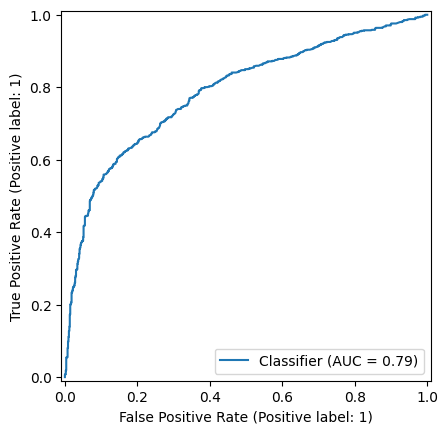

In [216]:
y_pred = pipeline.predict(X_test)
y_pred_proba =pipeline.predict_proba(X_test)
y_pred_tuned = pipeline_tuned.predict(X_test)
y_pred_proba_tuned = pipeline_tuned.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])
auc_display =  RocCurveDisplay.from_predictions(y_test, y_pred_proba_tuned[:,1]).roc_auc


print('ROC AUC Score Test Default: ', roc_auc)
print('ROC AUC Score Test Tuned: ', roc_auc_tuned)

Berdasarkan grafik ROC, model ini memiliki kemampuan yang cukup baik untuk mengidentifikasi nasabah yang berpotensi melakukan deposito. Area di bawah kurva (AUC) sebesar 0.79 menunjukkan bahwa model ini memiliki 79% peluang untuk dengan tepat membedakan antara nasabah yang akan deposito dan yang tidak.

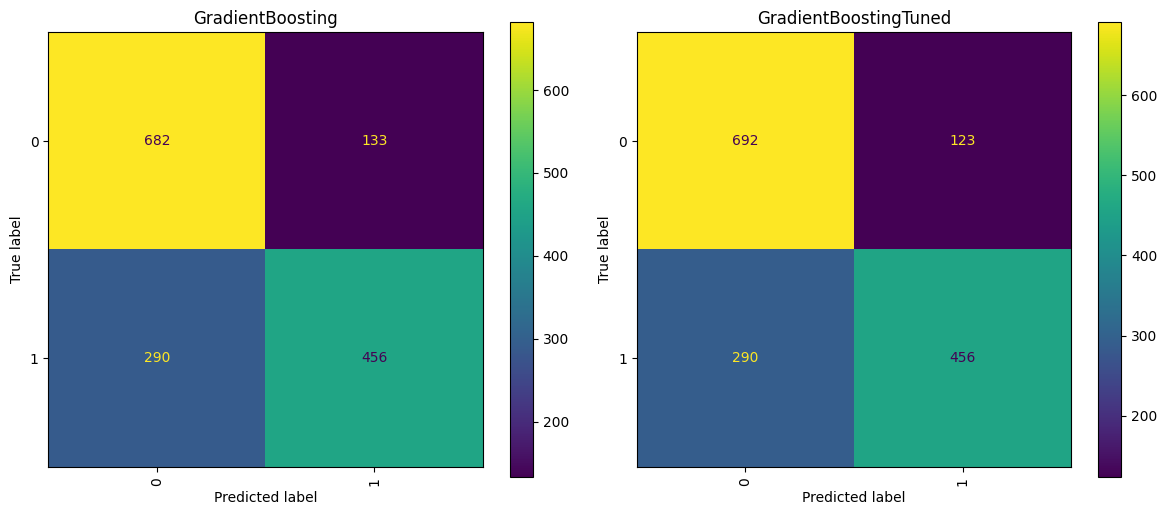

In [217]:
classifiers = {
    "GradientBoosting" : pipeline,
    "GradientBoostingTuned" : pipeline_tuned
}

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes = axes.flatten()

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=45)
    
    axes[i].set_title(key)
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [218]:
class_report = classification_report(y_test, y_pred)
class_report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Test Default: \n', class_report)
print('Classification Report Test Tuned: \n', class_report_tuned)

Classification Report Test Default: 
               precision    recall  f1-score   support

           0       0.70      0.85      0.77       815
           1       0.79      0.61      0.69       746

    accuracy                           0.74      1561
   macro avg       0.75      0.73      0.73      1561
weighted avg       0.74      0.74      0.73      1561

Classification Report Test Tuned: 
               precision    recall  f1-score   support

           0       0.70      0.85      0.77       815
           1       0.79      0.61      0.69       746

    accuracy                           0.74      1561
   macro avg       0.75      0.73      0.73      1561
weighted avg       0.74      0.74      0.73      1561



Berdasarkan hasil classification report, tidak ada perubahan yang baik dari nilai precision, recall, dan juga f1-score. Namun, melihat dari gambar confusion matrix, terdapat sedikit perubahan dimana model dapat menangkap kelas True Positive dari False Positive sebanyak 10 data.

<h4> <b> Feature Importances </b> </h4>

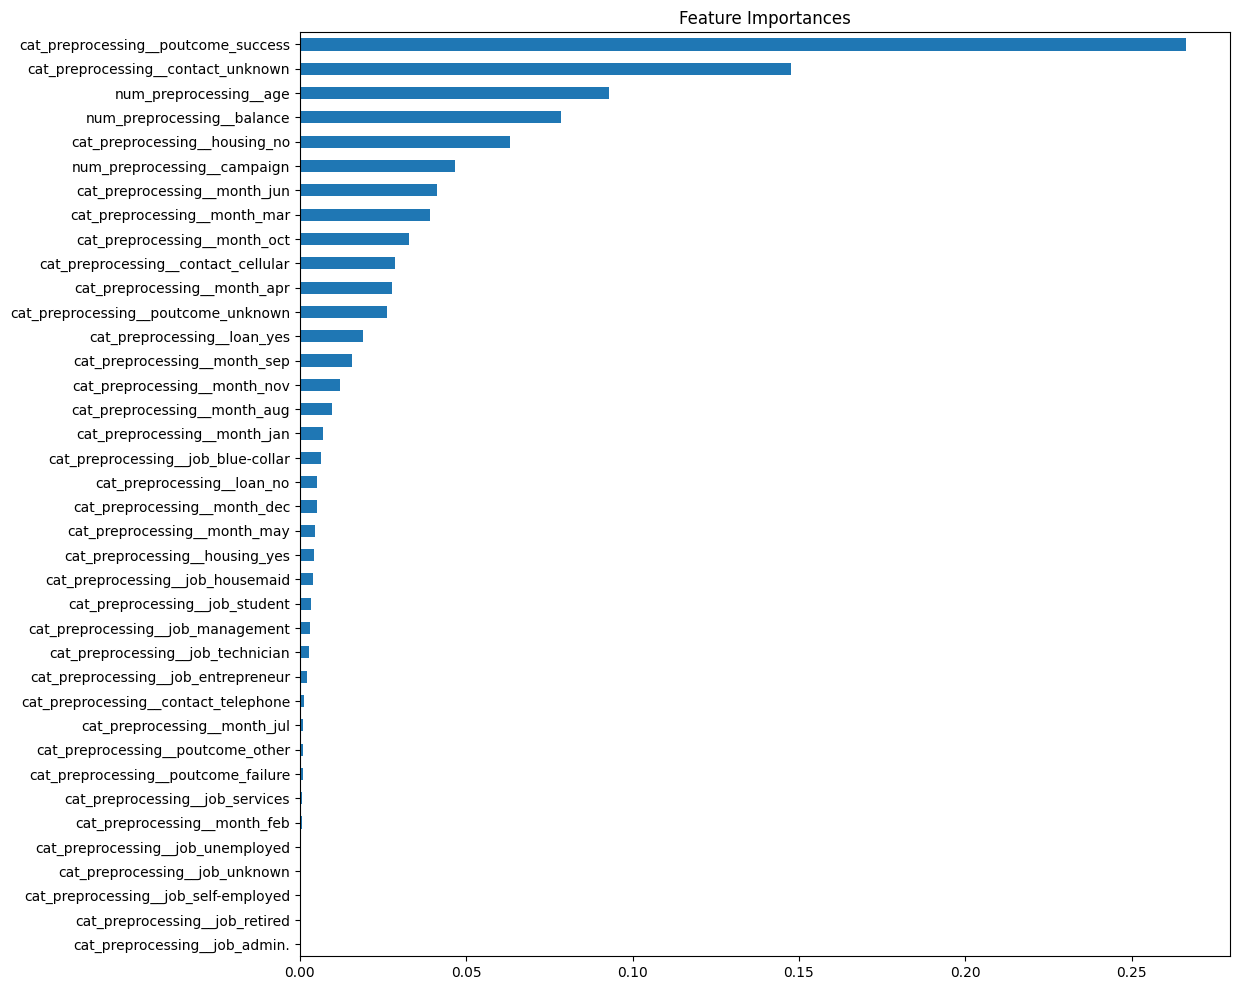

In [219]:
plt.figure(figsize=(12,12))
pd.Series(pipeline_tuned['Model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending= True).plot(kind='barh', title= 'Feature Importances' )
plt.show()

Secara model, fitur penting yang memiliki pengaruh besar dalam pemodelan adalah :
- poutcome_success
- contact_unknown
- age
- balance
- housing_no

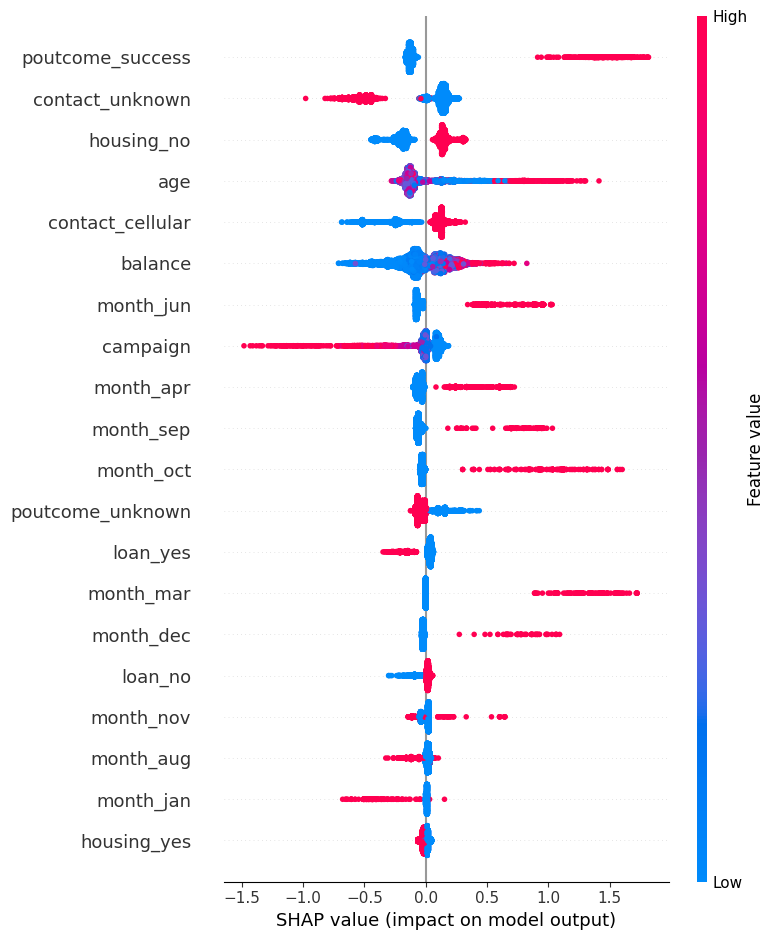

In [220]:
# Ambil OneHotEncoder
ohe = pipeline_tuned.named_steps['preprocess'].named_transformers_['cat_preprocessing'].named_steps['encode']

# Ambil nama fitur kategorikal setelah encoding
categorical_features = ohe.get_feature_names_out(['job', 'housing', 'loan', 'contact', 'month', 'poutcome'])

# Fitur numerikal
numerical_features = ['balance',  'campaign', 'age']

# Gabungkan semua nama fitur
feature_names = list(categorical_features) + numerical_features

shap.initjs()

X_train_processed = pipeline_tuned.named_steps['preprocess'].transform(X_train)
if hasattr(X_train_processed, "toarray"):
    X_train_processed = X_train_processed.toarray()
model = pipeline_tuned.named_steps['Model']
# Inisialisasi explainer
explainer = shap.TreeExplainer(model, X_train_processed)

# Hitung SHAP values
shap_values = explainer(X_train_processed)

# Visualisasi summary plot
shap.summary_plot(shap_values, X_train_processed, feature_names=feature_names)

Berdasarkan plot SHAP :
- poutcome_success menunjukkan nilai SHAP positif yang cukup besar, yang berarti nasabah yang kampanye sebelumnya sukses atau melakukan deposit, berpotensi melakukan deposit kembali
- contact_unknown menunjukkan nilai SHAP negatif yang cukup besar juga, yang berarti nasabah yang dikontak secara tidak diketahui berpotensi untuk tidak melakukan deposit.
- age menunjukkan umur yang lebih tinggi memiliki nilai SHAP positif yang besar dan umur yang lebih rendah juga memiliki nilai SHAP positif. Hal ini sesuai dengan analisis umur sebelumnya dimana nasabah dengan rentang umur dibawah 25 tahun dan diatas 60 tahun berpotensi untuk melakukan deposit.
- contact_cellular menunjukkan nilai SHAP positif, yang berarti nasabah yang dikontak lewat cellular lebih berpotensi melakukan deposit.
- balance menunjukkan semakin besar nilai balance maka nilai SHAP menunjukkan nilai positif yang lebih tinggi, begitupun sebaliknya. Berarti nasabah yang memiliki tabungan semakin besar lebih berpotensi melakukan deposit dibanding yang memiliki tabungan lebih kecil.
- housing_no menunjukkan nilai SHAP positif pada nasabah yang tidak memiliki cicilan rumah dan nilai SHAP negatif pada nasabah yang memiliki cicilan rumah. Berarti nasabah yang tidak memiliki cicilan rumah lebih berpotensi melakukan deposit dibanding yang memiliki cicilan rumah.
- Pada bulan-bulan seperti bulan maret, april, september, oktober, desember menunjukkan nilai SHAP positif yang tinggi yang berarti nasabah berpotensi melakukan deposit pada saat dihubungi dibulan tersebut dan bulan-bulan seperti bulan januari dan agustus menunjukkan nilai SHAP negatif yang berarti nasabah berpotensi menolak melakukan deposit pada saat dihubungi dibulan tersebut.

<b> Conclusion and Recommendation </b>

<b> Conclusion </b>



In [221]:
print('ROC AUC Score Test Default: ', roc_auc)
print('ROC AUC Score Test Tuned: ', roc_auc_tuned)

ROC AUC Score Test Default:  0.7871889340285203
ROC AUC Score Test Tuned:  0.7882489843582954


Kinerja model dengan ROC AUC Score sebesar 0.788 bisa masuk kedalam kategori cukup baik. Model dikatakan cukup baik dalam mengkategorikan atau membedakan kelas positif dan negatif

In [222]:
print('Classification Report Test Tuned: \n', class_report_tuned)

Classification Report Test Tuned: 
               precision    recall  f1-score   support

           0       0.70      0.85      0.77       815
           1       0.79      0.61      0.69       746

    accuracy                           0.74      1561
   macro avg       0.75      0.73      0.73      1561
weighted avg       0.74      0.74      0.73      1561



Analisis kinerja model klasifikasi menunjukkan kemampuannya dalam menyaring nasabah yang tidak berpotensi melakukan deposito berjangka dengan tingkat keberhasilan sebesar 85% (berdasarkan recall untuk kelas 0). Artinya, dari 100 nasabah yang sebenarnya tidak berpotensi, model mampu mengidentifikasi 85 di antaranya dengan tepat, sementara 15 nasabah salah diprediksi sebagai berpotensi, yang dapat menyebabkan bank mengeluarkan biaya pemasaran yang tidak perlu. Dengan kemampuan ini, bank dapat mengurangi biaya kampanye dengan menghindari pendekatan kepada sebagian besar nasabah yang tidak berpotensi.

Di sisi lain, model menunjukkan kemampuan dalam mengidentifikasi nasabah yang benar-benar berpotensi melakukan deposito dengan tingkat keberhasilan 61% (berdasarkan recall untuk kelas 1). Ini berarti, dari 100 nasabah yang sebenarnya berpotensi, model berhasil memprediksi 61 di antaranya, namun 39 nasabah yang berpotensi terlewatkan dan diprediksi sebagai tidak berpotensi, yang dapat menghilangkan peluang bisnis bagi bank.

Selain itu, model memiliki ketepatan prediksi sebesar 79% terhadap nasabah yang diprediksi berpotensi (berdasarkan precision untuk kelas 1). Dengan kata lain, dari 100 nasabah yang diprediksi berpotensi oleh model, 79 di antaranya memang benar-benar berpotensi, sedangkan 21 sisanya diprediksi salah, yang juga berkontribusi pada biaya pemasaran yang tidak efektif.

Secara keseluruhan, dengan akurasi 74%, model ini cukup baik dalam mengidentifikasi nasabah yang berpotensi melakukan deposito.

Asumsi Sebuah Bank memiliki 1000 nasabah dimana 400 nasabah berpotensi melakukan deposit dan 600 nasabah tidak berpotensi melakukan deposit. Biaya untuk melakukan marketing pada setiap nasabah adalah 15$. Berdasarkan skenario tersebut, bisa kita hitung bahwa :

Tanpa Model :
- Total Biaya :
    1000 × 15 = 15.000
- Budget Terbuang (mengontak nasabah yang tidak melakukan deposit) :
    600 × 15 = 9.000

Dengan Model :
- True Positive (TP) = 400×0.61 (berdasarkan recall 61%) = 244
- Total Prediksi Positif = 244/0.79 (berdasarkan precision 79%) ≈309
- False Positive = 309 − 244 = 65
- Total biaya = 309 × 15 = 4.635
- Budget terbuang = 65 × 15 = 975

Dengan demikian, <br>
Penghematan budget = 9000 - 975 = 8025

Jika melihat sisi keuntungan dimana aturan bank mengharuskan nasabah yang ingin melakukan deposit minimal sebesar 1000$

<table>
  <tr>
    <th>Skenario</th>
    <th>Pendapatan</th>
    <th>Biaya Kontak</th>
    <th>Keuntungan Bersih</th>
  </tr>
  <tr>
    <td>Tanpa Model</td>
    <td>400.000</td>
    <td>15.000</td>
    <td>385.000</td>
  </tr>
  <tr>
    <td>Dengan Model</td>
    <td>244.000</td>
    <td>4.635</td>
    <td>239.365</td>
  </tr>
</table>

- Tanpa model, bank memperoleh keuntungan lebih besar ($385.000) karena semua nasabah potensial berhasil dikontak, meskipun biaya kontak lebih tinggi.
- Dengan model, keuntungan turun ($239.365) karena 156 nasabah potensial (False Negative) tidak dikontak akibat recall 61%.
- Namun, model menghemat biaya kontak secara signifikan (dari $15.000 menjadi $4.635), dan budget terbuang (kontak ke nasabah non-potensial) berkurang dari $9.000 menjadi $975.


<b> Recommendation Bank</b> <br>

1. Bank bisa lebih fokus terhadap nasabah yang memiliki riwayat sukses di kampanye sebelumnya.
2. Bank bisa lebih banyak melakukan marketing terhadap nasabah pelajar dan juga nasabah yang sudah pensiun.
3. Bank bisa lebih fokus menghubungi nasabah lewat cellular.
4. Bank bisa lebih fokus menghubungi nasabah di rentang umur dibawah 25 dan diatas 60 tahun.
5. Bank bisa lebih fokus nasabah yang tidak memiliki cicilan rumah serta pinjaman atau hutang.
6. Bank bisa lebih fokus nasabah yang memiliki tabungan cukup besar, mulai dari nasabah dengan tabungan lebih dari 855.
7. Bank bisa mengurangi intensitas dalam mengontak nasabah untuk mengurangi overcontacting.
8. Bank bisa lebih mulai menghubungi nasabah di bulan-bulan seperti maret, september, oktober, december.

<b> Recommendation Model</b> 

1. Bank harus lebih bisa dalam mengumpulkan data secara lengkap, mengurangi nilai data seperti 'unknown' dan juga 'other' pada setiap fitur
2. Melihat feature importances pada data kategorikal dan numerikal memiliki pengaruh yang sama besarnya, bank bisa menambahkan fitur seperti status menikah, jumlah anak, edukasi, dan lain-lain.
3. Uji model lainnya, seperti ExtremeGradientBoosting, Light Gradient Boosting, Support Vector Machine, dan model klasifikasi lainnya. 

<b> Limitasi Model </b> 

1. Model bergantung pada data kampanye sebelumnya. Jika pasar atau perilaku nasabah berubah secara signifikan, model mungkin tidak akurat.
2. Model sudah menggunakan evaluasi metric seperti ROC AUC guna memprioritaskan kedua kelas sama pentingnya. Namun, nilai recall pada class 1 masih sangat kecil.

In [225]:
import pickle
# Save Model 
filename = 'Model_GradientBoosting_Tuned.pkl'
pickle.dump(pipeline_tuned, open(filename, 'wb'))